In [1]:
import keras

ModuleNotFoundError: No module named 'keras'

**[Künstliche neuronale Netzwerke](https://de.wikipedia.org/wiki/K%C3%BCnstliches_neuronales_Netz)** gehen in ihrer konzeptionellen Grundlagen auf die Arbeit von [Warren McCulloch](https://de.wikipedia.org/wiki/Warren_McCulloch) und [Walter Pitts](https://de.wikipedia.org/wiki/Walter_Pitts) zurück, die bereits $1943$ in Analogie zu Neuronen verknüpfte Netzwerke zur räumlichen Mustererkennung vorschlugen. $1958$ gelang [Frank Rosenblatt et al.](https://de.wikipedia.org/wiki/Frank_Rosenblatt) in Form des **[Perzeptrons](https://de.wikipedia.org/wiki/Perzeptron)** die erste praktische Umsetzung eines neuronalen Netzwerks. $1969$ führte die Kritik von [Marvin Minsky](https://de.wikipedia.org/wiki/Marvin_Minsky) an der Unfähigkeit, mit einfachen Perzeptrons nicht linear separierbare Probleme (wie zum Beispiel beim **[XOR-Problem](https://de.wikipedia.org/wiki/Exklusiv-Oder-Gatter)**)  zu lösen, zu einem zeitweisen Rückgang des Forschungsinteresses (dem sogenannten KI-Winter) ({cite:t}`Sonnet.2022`, s.25 ). Dies änderte sich in den $1980$er Jahren, als durch verschiedene Fortschritte in der KI-Forschung wie zum Beispiel der Methode der **[Backpropagation](https://de.wikipedia.org/wiki/Backpropagation)** gezeigt werden konnte, dass mehrschichtige Perzeptrons auch in der Lage sind, nicht linear separierbare Probleme zu bewältigen. 

Wir haben an anderer Stelle im Einzelnen über die verschiedenen Arten des maschinellen Lernens - das **[unüberwachte Lernen](https://de.wikipedia.org/wiki/Un%C3%BCberwachtes_Lernen)**, **[überwachte Lernen](https://de.wikipedia.org/wiki/%C3%9Cberwachtes_Lernen)** und **[bestärkende Lernen](https://de.wikipedia.org/wiki/Best%C3%A4rkendes_Lernen)** - gesprochen. Wir haben verschiedene Machine-Learning-Algorithmen vorgestellt, die bei den unterschiedlichen Lernarten zum Einsatz kommen. Neuronale Netze zeichnen sich insbesondere dadurch aus, dass sie bei entsprechender Vorbereitung in allen drei Arten des Lernens erfolgreich eingesetzt werden können. Diese universelle Verwendbarkeit erklärt auch den vermehrten Einsatz von künstlichen neuronalen Netzwerken in unterschiedlichsten Bereichen ({cite:t}`Sonnet.2022`, s.12 ).

In diesem Kapitel werden wir uns mit den Stärken und Schwächen von **neuronalen Netzwerken** sowie deren Einsatzmöglichkeiten und der zugrunde liegenden mathematischen Formulierung beschäftigen.

Um **künstliche neuronale Netzwerke** in `Python` umzusetzen, werden wir in diesem Kapitel auf `Keras` zurückgreifen.
`Keras` ist eine High Level API für das Erstellen und Trainieren von **künstlichen neuronalen Netzwerken** (*engl. Artificial Neural Network - ANN*).

Es wurde ursprünglich als eigenständiges **Deep-Learning-Framework** entwickelt und später in `TensorFlow` integriert. `Keras` zeichnet sich im Gegensatz zu anderen Deep-Learning-Frameworks wie zum Beispiel `TensorFlow` und `PyTorch` durch seine einfache und benutzerfreundliche Schnittstelle aus, die es Entwicklern ermöglicht, neuronale Netzwerke schnell und effizient zu entwerfen, anzupassen und zu trainieren.

`Keras` bietet eine Vielzahl von vorgefertigten Schichttypen und Modellarchitekturen, die es einfach machen, komplexe neuronale Netzwerke zu erstellen, ohne tief in die Implementierungsdetails eintauchen zu müssen. Mehr zu `Keras` erfahren Sie **[hier](https://keras.io/guides/)**.

## Grundlegende Struktur von künstlichen neuronalen Netzwerken

Die Struktur von **künstlichen neuronalen Netzwerken** folgt im Grundprinzip dem Aufbau eines **biologischen Nervensystems**. In neuronalen Netzwerken entsprechen Neuronen den **[künstlichen Neuronen](https://de.wikipedia.org/wiki/K%C3%BCnstliches_Neuron)** oder Knoten im Netzwerk. Diese Neuronen sind die grundlegenden Verarbeitungseinheiten. 

Künstliche neuronale Netzwerke bestehen aus einzelnen Neuronen die in sogenannten Schichten (*engl. Layers*) angeordnet sind. Dabei besteht die erste Schicht (*engl. Input Layer*) aus den Eingabewerten, gefolgt von weiteren Schichten von Neuronen, den sogenannten *Hidden Layers* und schließlich einer Ausgabeschicht (*engl. Output Layer*).

In Analogie zu biologischen Neuronen, die durch Anregung über einen gewissen Grenzwert aktiviert werden, Reize weiterzuleiten, wird bei neuronalen Netzwerken die gewichtete Summe der Inputs an verbundene Neuronen weitergegeben. Bezogen auf ein Neuron ergibt sich:

$$ \text{Input} = \sum_{i=1}^N x_i w_i $$

Dabei sind die $x_i$ die einzelnen Eingabewerte und die $w_i$ die jeweiligen Gewichtungen der $N$ Inputs.

Im Äquivalent zu der biologischen Schwelle, ab der ein Neuron aktiviert wird, um ein Signal weiterzuleiten, können wir einen Schwellenwert $b$ hinzufügen, den sogenannten Bias.

$$ \text{Input} = \sum_{i=1}^N x_i w_i + b$$

Diese gewichtete Summe geht in die gewählte Aktivierungsfunktion ein. Diese Funktion bildet die gewichtete Summe der Eingabewerte auf einen bestimmten Wertebereich ab und dient dazu, die Ausgabe eines Neurons oder einer Schicht zu steuern. Sie entscheidet, ob und in welchem Maße ein Neuron aktiviert wird und welche Informationen an die nächsten Schichten weitergegeben werden. Im Weiterern ermöglichen geeignete Aktivierungsfunktionen, auch nicht lineare Zusammenhänge zu beschreiben. Auf die genaue Form von verschiedenen Aktivierungsfunktionen werden wir später zurückkommen und gehen für den Moment von einer **[Heaviside-Sprungfunktion](https://de.wikipedia.org/wiki/Heaviside-Funktion)** als Aktivierungsfunktion aus, was in Bezug auf biologischen System dem **[Alles-oder-nichts-Gesetz](https://de.wikipedia.org/wiki/Alles-oder-nichts-Gesetz)** entspricht.

$$f_{\text{Aktiv}}(\text{Input}) = f_{\text{Aktiv}}(\sum_{i=1}^N x_i w_i + b) \begin{cases}
1 & \sum_{i=1}^N x_i w_i + b \ge 0, \\ 0 & \text{sonst}
\end{cases} $$

Erwähnt sei, dass die Heaviside-Sprungfunktion, die in diesem Beispiel nur zur Veranschaulichung des Grundprinzips von neuronalen Netzwerken zum Einsatz kommt, in der Praxis oft keine geeignete Wahl für eine Aktivierungsfunktion darstellt, da sie nicht **[stetig differenzierbar](https://de.wikipedia.org/wiki/Differenzierbarkeit#Stetige_Differenzierbarkeit_und_h%C3%B6here_Ableitungen)** ist und daher bestimmte Optimierungsverfahren wie zum Beispiel das **[Stochastic-Gradient-Descent-Verfahren](https://en.wikipedia.org/wiki/Stochastic_gradient_descent)**, nicht angewendet werden können.

In der folgenden Abbildung ist die **Heaviside-Sprungfunktion** dargestellt.

In [2]:
import matplotlib.pyplot as plt
import numpy as np

import matplotlib.animation as animation

C:\Users\Zak\anaconda3\envs\ks_test\lib\site-packages\matplotlib\animation.py:872: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


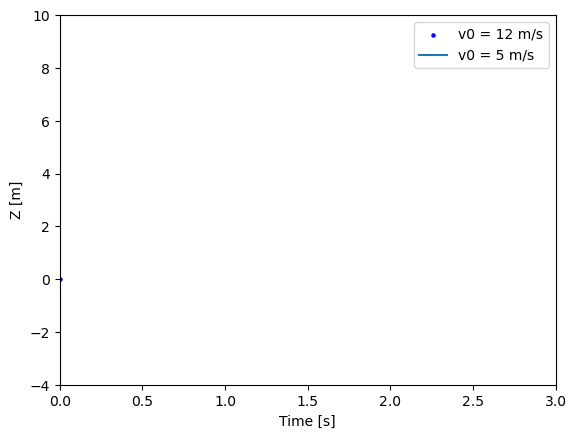

In [4]:
fig, ax = plt.subplots()
t = np.linspace(0, 3, 40)
g = -9.81
v0 = 12
z = g * t**2 / 2 + v0 * t

v02 = 5
z2 = g * t**2 / 2 + v02 * t

scat = ax.scatter(t[0], z[0], c="b", s=5, label=f'v0 = {v0} m/s')
line2 = ax.plot(t[0], z2[0], label=f'v0 = {v02} m/s')[0]
ax.set(xlim=[0, 3], ylim=[-4, 10], xlabel='Time [s]', ylabel='Z [m]')
ax.legend()


def update(frame):
    # for each frame, update the data stored on each artist.
    x = t[:frame]
    y = z[:frame]
    # update the scatter plot:
    data = np.stack([x, y]).T
    scat.set_offsets(data)
    # update the line plot:
    line2.set_xdata(t[:frame])
    line2.set_ydata(z2[:frame])
    return (scat, line2)


ani = animation.FuncAnimation(fig=fig, func=update, frames=40, interval=30)
plt.show()

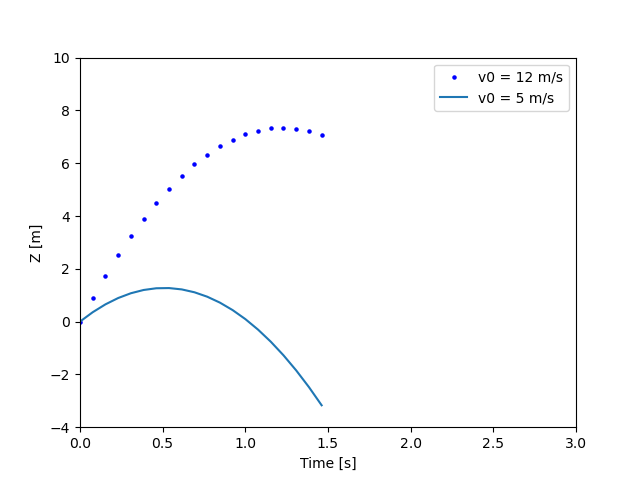

In [1]:
from IPython import display
display.Image("Figure_1.png")

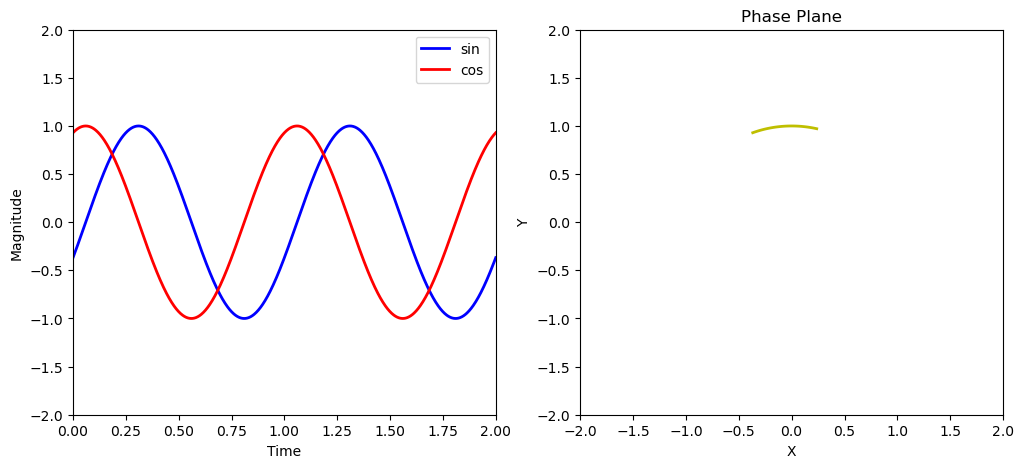

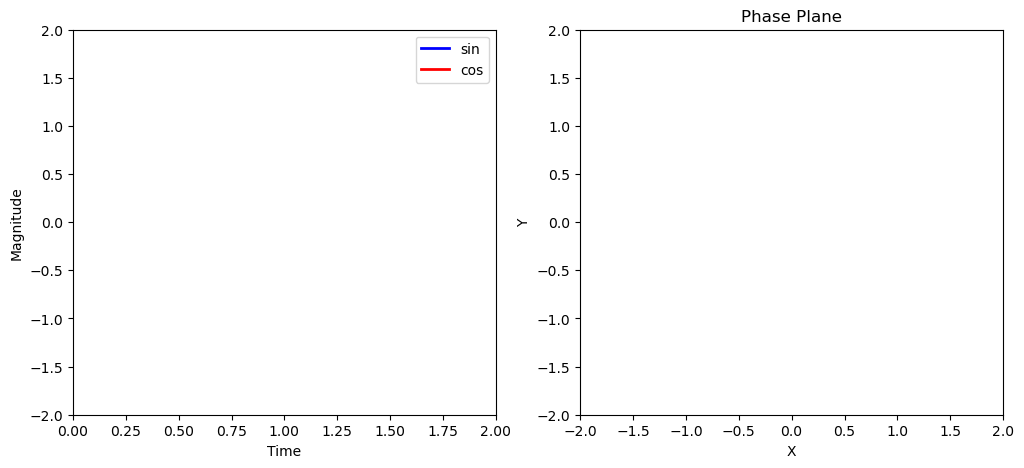

In [7]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# create a figure and axes
fig = plt.figure(figsize=(12,5))
ax1 = plt.subplot(1,2,1)   
ax2 = plt.subplot(1,2,2)

# set up the subplots as needed
ax1.set_xlim(( 0, 2))            
ax1.set_ylim((-2, 2))
ax1.set_xlabel('Time')
ax1.set_ylabel('Magnitude')

ax2.set_xlim((-2,2))
ax2.set_ylim((-2,2))
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_title('Phase Plane')

# create objects that will change in the animation. These are
# initially empty, and will be given new values for each frame
# in the animation.
txt_title = ax1.set_title('')
line1, = ax1.plot([], [], 'b', lw=2)     # ax.plot returns a list of 2D line objects
line2, = ax1.plot([], [], 'r', lw=2)
pt1, = ax2.plot([], [], 'g.', ms=20)
line3, = ax2.plot([], [], 'y', lw=2)

ax1.legend(['sin','cos']);
plt.show()

In [3]:
# animation function. This is called sequentially
def drawframe(n):
    x = np.linspace(0, 2, 1000)
    y1 = np.sin(2 * np.pi * (x - 0.01 * n))
    y2 = np.cos(2 * np.pi * (x - 0.01 * n))
    line1.set_data(x, y1)
    line2.set_data(x, y2)
    line3.set_data(y1[0:50],y2[0:50])
    pt1.set_data(y1[0],y2[0])
    txt_title.set_text('Frame = {0:4d}'.format(n))
    return (line1,line2)

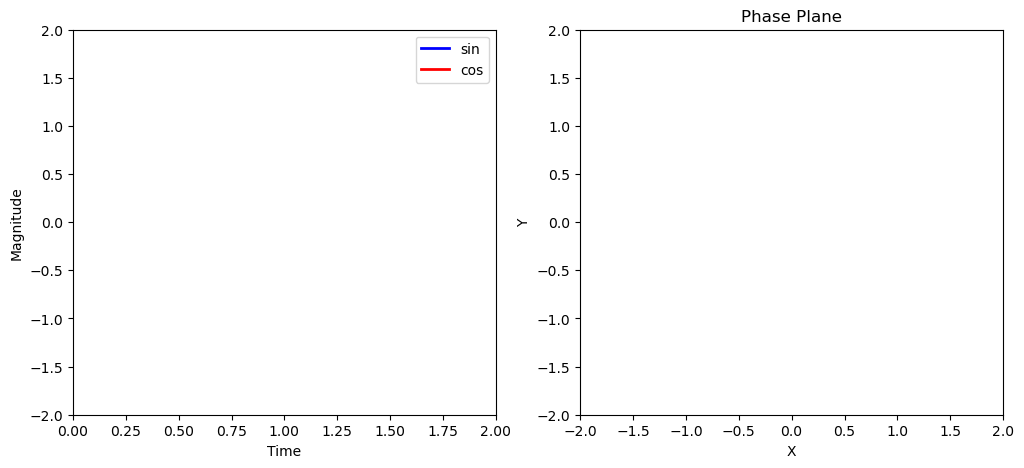

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# create a figure and axes
fig = plt.figure(figsize=(12,5))
ax1 = plt.subplot(1,2,1)   
ax2 = plt.subplot(1,2,2)

# set up the subplots as needed
ax1.set_xlim(( 0, 2))            
ax1.set_ylim((-2, 2))
ax1.set_xlabel('Time')
ax1.set_ylabel('Magnitude')

ax2.set_xlim((-2,2))
ax2.set_ylim((-2,2))
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_title('Phase Plane')

# create objects that will change in the animation. These are
# initially empty, and will be given new values for each frame
txt_title = ax1.set_title('')
line1, = ax1.plot([], [], 'b', lw=2)     # ax.plot returns a list of 2D line objects
line2, = ax1.plot([], [], 'r', lw=2)
pt1, = ax2.plot([], [], 'g.', ms=20)
line3, = ax2.plot([], [], 'y', lw=2)

ax1.legend(['sin','cos'])

# Create data for the animation
t = np.linspace(0, 2*np.pi, 100)
y1 = np.sin(t)
y2 = np.cos(t)

# Function to initialize the plot for the animation
def init():
    line1.set_data([], [])
    line2.set_data([], [])
    pt1.set_data([], [])
    line3.set_data([], [])
    return line1, line2, pt1, line3

# Function to update the plot for each frame
def drawframe(n):
    # Update the sinusoidal lines
    line1.set_data(t[:n], y1[:n])
    line2.set_data(t[:n], y2[:n])

    # Update the point on the phase plane (plotting as green dot)
    pt1.set_data([y1[n-1]], [y2[n-1]])

    # Update the line in the phase plane (yellow)
    line3.set_data(y1[:n], y2[:n])

    # Update the title text
    txt_title.set_text('Frame = {0:4d}'.format(n))
    
    return line1, line2, pt1, line3

# Create the animation
anim = animation.FuncAnimation(fig, drawframe, frames=100, interval=20, init_func=init, blit=True)

plt.show()


In [16]:
from matplotlib import animation

# blit=True re-draws only the parts that have changed.
anim = animation.FuncAnimation(fig, drawframe, frames=100, interval=2000, blit=True)

In [17]:
from IPython.display import HTML
HTML(anim.to_html5_video())

In [24]:
%load_ext watermark

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark


In [25]:
%watermark -v -m -p jupyterlab,pandas,matplotlib,seaborn,numpy,watermark

Python implementation: CPython
Python version       : 3.10.15
IPython version      : 8.27.0

jupyterlab: 4.2.5
pandas    : 2.2.2
matplotlib: 3.9.2
seaborn   : 0.13.2
numpy     : 1.26.4
watermark : 2.5.0

Compiler    : MSC v.1929 64 bit (AMD64)
OS          : Windows
Release     : 10
Machine     : AMD64
Processor   : AMD64 Family 25 Model 97 Stepping 2, AuthenticAMD
CPU cores   : 16
Architecture: 64bit



In [26]:
print(" ")
%watermark -u -n -t -z

 
Last updated: Tue Nov 26 2024 17:13:01W. Europe Standard Time

